In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
X=df.iloc[:,0:5]
y=df.iloc[:,-1]

In [8]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [9]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Model without Regulaizer

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
model1 = Sequential()

model1.add(Dense(128,input_dim=5, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17409 (68.00 KB)
Trainable params: 17409 (68.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])

history1 = model1.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 138.5633 - mean_absolute_error: 5.8994 - val_loss: 7.4887 - val_mean_absolute_error: 2.1640
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 6.0168 - mean_absolute_error: 1.9510 - val_loss: 5.3346 - val_mean_absolute_error: 1.8357
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 5.2482 - mean_absolute_error: 1.8266 - val_loss: 5.5323 - val_mean_absolute_error: 1.8607
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 5.1906 - mean_absolute_error: 1.8174 - val_loss: 6.6317 - val_mean_absolute_error: 2.0308
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 5.4663 - mean_absolute_error: 1.8683 - val_loss: 6.3791 - val_mean_absolute_error: 2.0056
Epoch 6/500
250/250 [==============================] - 1s 2ms/step - loss: 5.4524 - mean_absolute_error: 1.8555 - val_loss: 5.7030 - val_mean_absolute_error: 1.9020
Epoch 7/

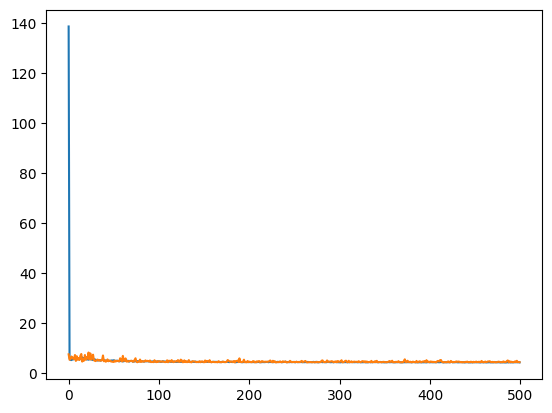

In [16]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

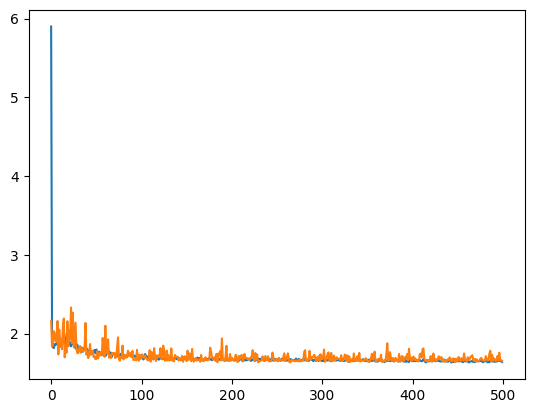

In [17]:
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])

### Model with L1 regularization

In [18]:
model2 = Sequential()

model2.add(Dense(128,input_dim=5, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.009)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.009)))
model2.add(Dense(1,activation='linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17409 (68.00 KB)
Trainable params: 17409 (68.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])

history2 = model2.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 142.0429 - mean_absolute_error: 5.8682 - val_loss: 17.0905 - val_mean_absolute_error: 2.2068
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 14.3425 - mean_absolute_error: 1.9591 - val_loss: 12.4693 - val_mean_absolute_error: 1.8167
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 11.6806 - mean_absolute_error: 1.8399 - val_loss: 11.3368 - val_mean_absolute_error: 1.9031
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 10.4014 - mean_absolute_error: 1.8282 - val_loss: 9.4415 - val_mean_absolute_error: 1.7271
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 9.7761 - mean_absolute_error: 1.8607 - val_loss: 10.2172 - val_mean_absolute_error: 1.9997
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 9.7646 - mean_absolute_error: 1.9634 - val_loss: 9.6332 - val_mean_absolute_error: 1.9614
E

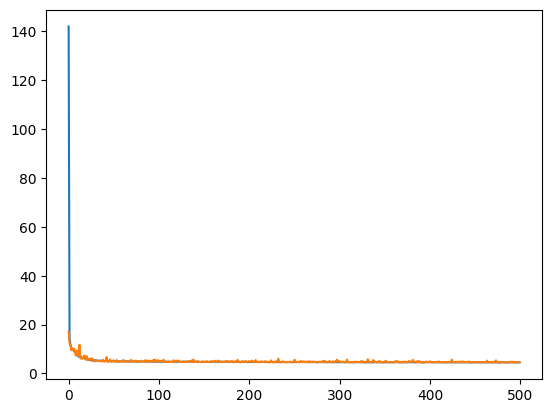

In [20]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

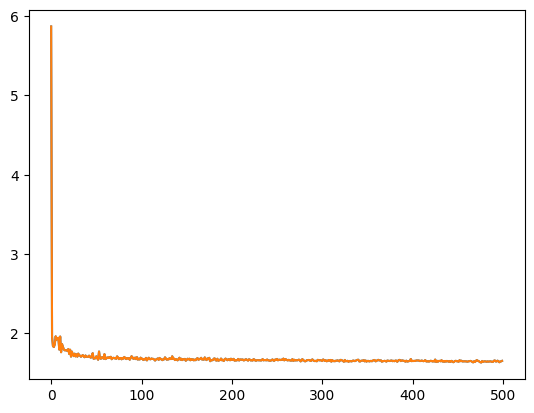

In [21]:
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['mean_absolute_error'])

### Model with L2 regularization

In [22]:
model3 = Sequential()

model3.add(Dense(128,input_dim=5, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))#0.03 is regularization factor lambda value
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))#0.03 is regularization factor lambda value
model3.add(Dense(1,activation='linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               768       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17409 (68.00 KB)
Trainable params: 17409 (68.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])

history3 = model3.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 158.5122 - mean_absolute_error: 6.0305 - val_loss: 11.7452 - val_mean_absolute_error: 2.0208
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 9.8340 - mean_absolute_error: 1.8220 - val_loss: 9.1255 - val_mean_absolute_error: 1.8266
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 8.3279 - mean_absolute_error: 1.7748 - val_loss: 8.2757 - val_mean_absolute_error: 1.8300
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 7.9140 - mean_absolute_error: 1.8251 - val_loss: 7.4037 - val_mean_absolute_error: 1.7663
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 7.7071 - mean_absolute_error: 1.8674 - val_loss: 8.5037 - val_mean_absolute_error: 2.0386
Epoch 6/500
250/250 [==============================] - 1s 2ms/step - loss: 8.4814 - mean_absolute_error: 2.0123 - val_loss: 9.2480 - val_mean_absolute_error: 2.1792
Epoch 7

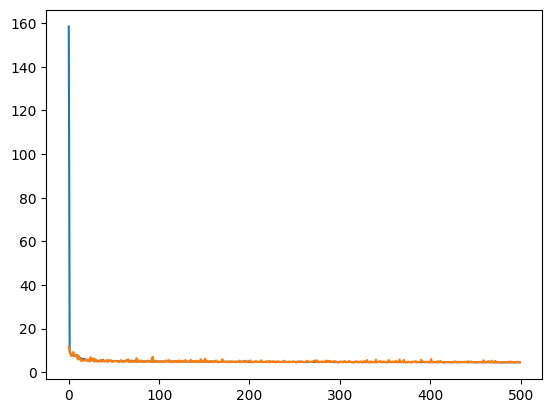

In [24]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

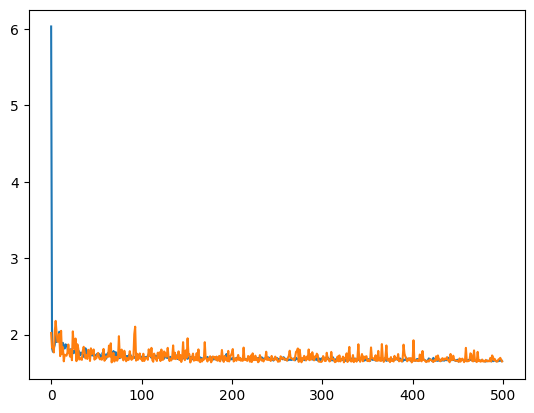

In [25]:
plt.plot(history3.history['mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])